In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import re

# Geneva timeline

In [76]:
# Original data + new file
data = [
    ("Lubières", 1760, 1769),
    ("Deluc", 1767, 1772),
    ("Deluc", 1773, 1776),
    ("Deluc", 1777, 1781),
    ("Deluc", 1782, 1787),
    ("Deluc", 1788, 1793),
    ("Deluc", 1794, 1800),
    ("Avully", 1778, 1786),
    ("Genthod", 1789, 1795),
    ("Palatina", 1782, 1789),
    ("DigiHom", 1796, 1863)
]

df = pd.DataFrame(data, columns=["Observer", "Start", "End"])

# Merge overlapping or consecutive periods for each observer
merged = []
for name, group in df.groupby("Observer"):
    group = group.sort_values("Start")
    start, end = group.iloc[0][["Start", "End"]]
    for _, row in group.iloc[1:].iterrows():
        if row["Start"] <= end + 1:
            end = max(end, row["End"])
        else:
            merged.append((name, start, end))
            start, end = row["Start"], row["End"]
    merged.append((name, start, end))

merged_df = pd.DataFrame(merged, columns=["Observer", "Start", "End"])
merged_df = merged_df.sort_values("Start").reset_index(drop=True)

merged_df.head()

,Observer,Start,End
0,Lubières,1760,1769
1,Deluc,1767,1800
2,Avully,1778,1786
3,Palatina,1782,1789
4,Genthod,1789,1795


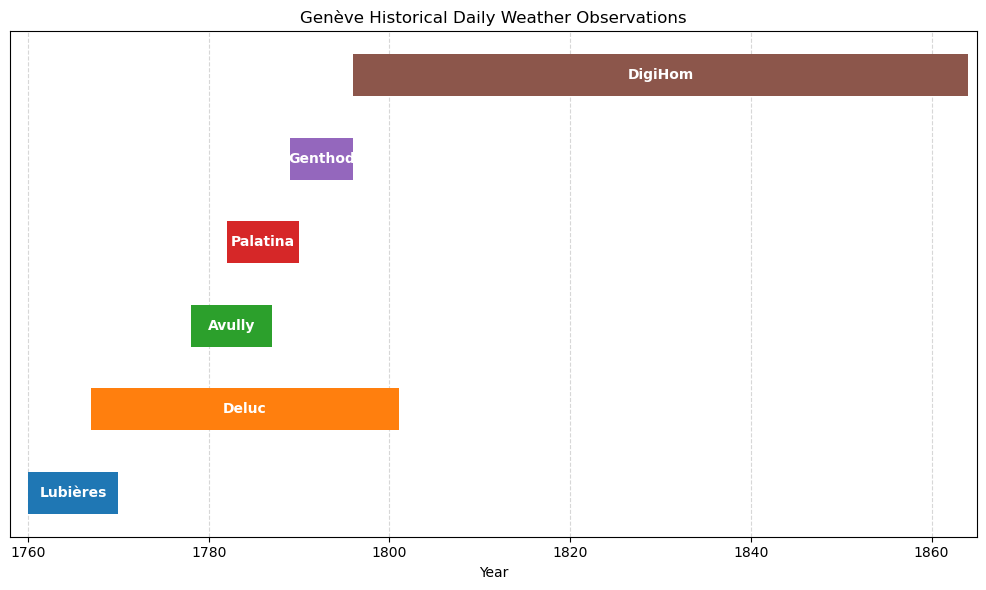

In [79]:
# Plot timeline
fig, ax = plt.subplots(figsize=(10, 6))
y_positions = range(len(merged_df))
for y, row in zip(y_positions, merged_df.itertuples(index=False)):
    ax.barh(y, row.End - row.Start + 1, left=row.Start, height=0.5)
    ax.text((row.Start + row.End) / 2 + .5, y, row.Observer, va="center", ha="center", 
            weight="bold", color="white", fontsize=10)

ax.grid(True, axis="x", linestyle="--", alpha=0.5)
ax.set_axisbelow(True)


ax.set_yticks([])
ax.set_xlabel("Year")
ax.set_xlim(1758, 1865)
ax.set_title("Genève Historical Daily Weather Observations")
plt.tight_layout()
plt.savefig("geneva_observers_timeline.png", dpi=300)
plt.show()


# Zurich timeline

In [80]:
dir = "/scratch3/PALAEO-RA/daily_data/original/Zurich/"
files = [f for f in os.listdir(dir) if f.endswith((".xlsx", ".xls"))]
data = [
    ("Scheuchzer", 1731, 1733),
    ("Meyer", 1761, 1762),
    ("Muralt", 1760, 1769),
    ("Muralt", 1760, 1793),
    ("Hirzel", 1770, 1774),
    ("Hirzel", 1775, 1780),
    ("Hirzel", 1781, 1786),
    ("Muralt", 1781, 1785),
    ("Muralt", 1787, 1793),
    ("Hirzel", 1795, 1802),
    ("Feer", 1807, 1810),
    ("Feer", 1811, 1814),
    ("Feer", 1815, 1818),
    ("Feer", 1819, 1822),
    ("Feer", 1823, 1827),
    ("Escher", 1816, 1816),
    ("Horner", 1812, 1814),
    ("Horner", 1814, 1821),
    ("Horner", 1823, 1823),
    ("Horner", 1825, 1825),  # Bleycherweg
    ("Horner", 1825, 1825),  # Muehlestein
    ("Horner", 1827, 1829),
    ("Horner", 1827, 1831),
    ("Horner", 1830, 1830),
    ("Horner", 1832, 1834),
    ("Horner", 1835, 1835),
    ("Hofmeister", 1834, 1834),
    ("Hofmeister", 1835, 1837),
    ("Hofmeister", 1838, 1838),
    ("Hofmeister", 1840, 1841),
    ("SNG", 1830, 1832),
    ("Weiss", 1823, 1824),
    ("NGZ", 1849, 1851),
    ("Hornig", 1851, 1852)
]

df = pd.DataFrame(data, columns=["Observer", "Start", "End"])

# Merge overlapping or consecutive periods for each observer
merged = []
for name, group in df.groupby("Observer"):
    group = group.sort_values("Start")
    start, end = group.iloc[0][["Start", "End"]]
    for _, row in group.iloc[1:].iterrows():
        if row["Start"] <= end + 1:
            end = max(end, row["End"])
        else:
            merged.append((name, start, end))
            start, end = row["Start"], row["End"]
    merged.append((name, start, end))

merged_df = pd.DataFrame(merged, columns=["Observer", "Start", "End"])
merged_df = merged_df.sort_values("Start").reset_index(drop=True)

merged_df.head()

,Observer,Start,End
0,Scheuchzer,1731,1733
1,Muralt,1760,1793
2,Meyer,1761,1762
3,Hirzel,1770,1786
4,Hirzel,1795,1802


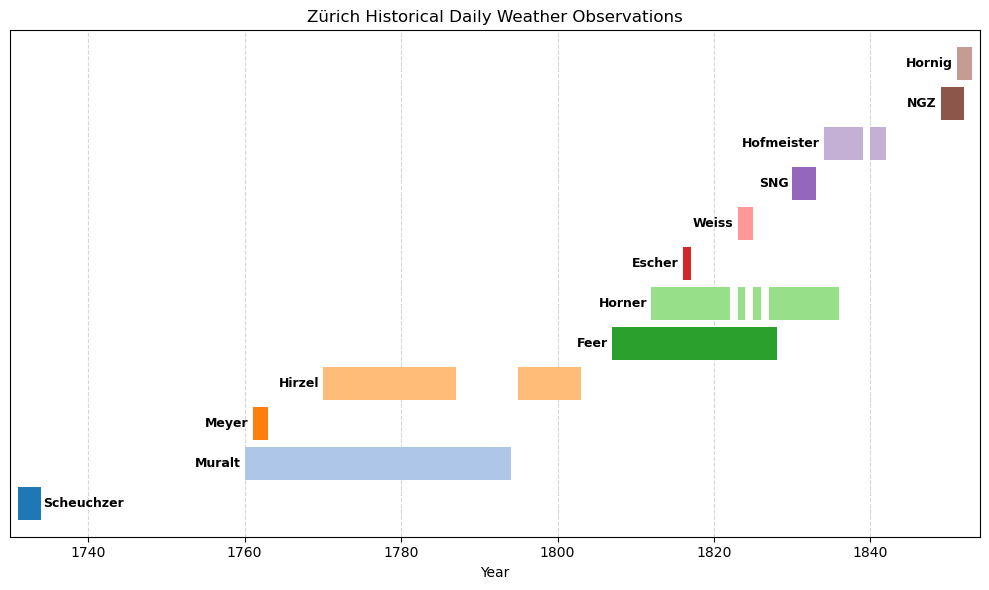

In [81]:

fig, ax = plt.subplots(figsize=(10, 6))

# assign a unique y per observer
observers = merged_df["Observer"].unique()
spacing = 0.6

y_map = {obs: i * spacing for i, obs in enumerate(observers)}

# optional: consistent colors per observer
colors = plt.cm.tab20.colors
color_map = {obs: colors[i % len(colors)] for i, obs in enumerate(observers)}

for _, row in merged_df.iterrows():
    y = y_map[row.Observer]
    ax.barh(y, row.End - row.Start + 1, left=row.Start, height=0.5,
            color=color_map[row.Observer])

# add one label per observer (except Scheuchzer on the right)
for obs in observers:
    group = merged_df[merged_df["Observer"] == obs]
    y = y_map[obs]
    start = group["Start"].min()
    end = group["End"].max()
    if obs == "Scheuchzer":
        ax.text(end + 1.25, y, obs, va="center", ha="left",
                weight="bold", color="black", fontsize=9)
    else:
        ax.text(start - 0.5, y, obs, va="center", ha="right",
                weight="bold", color="black", fontsize=9)

# set grid lines
ax.grid(True, axis="x", linestyle="--", alpha=0.5)
ax.set_axisbelow(True)

ax.set_yticks([])
ax.set_ylim(-0.5, max(y_map.values()) + 0.5)
ax.set_xlabel("Year")
ax.set_xlim(1730, 1854)
ax.set_title("Zürich Historical Daily Weather Observations")
plt.tight_layout()
plt.savefig("zurich_observers_timeline.png", dpi=300)
plt.show()

# Zurich available vars

In [9]:

# --- SETTINGS ---
dir = "/scratch3/PALAEO-RA/daily_data/final/Zurich-final/"
files = [f for f in os.listdir(dir) if f.endswith(".tsv")]

# --- PARSE FILENAMES ---
data = []
pattern = re.compile(
    r"(?:GCOS_)?Zurich_([A-Za-z]+)_(\d{8})-(\d{8})_([A-Za-z]+)(?:_[A-Za-z]+)*_(?:subdaily|daily)"
)
for f in files:
    name = Path(f).stem
    m = pattern.search(name)
    if m:
        observer, start, end, var = m.groups()
        start_y = int(start[:4])
        end_y = int(end[:4])
        data.append((observer, var, start_y, end_y))

df = pd.DataFrame(data, columns=["Observer", "Variable", "Start", "End"])
df["Observer"] = df["Observer"].replace("Bruegger", "Brügger")
print(df)

      Observer Variable  Start   End
0   Hofmeister       dd   1838  1841
1       Horner        w   1827  1834
2       Hornig       dd   1851  1852
3        Weiss       dd   1823  1824
4       Escher       rh   1816  1816
..         ...      ...    ...   ...
69         Ott       ta   1756  1769
70      Muralt      rrt   1781  1793
71        Feer       dd   1807  1827
72      Horner       ta   1832  1834
73         NGZ       Tx   1836  1842

[74 rows x 4 columns]


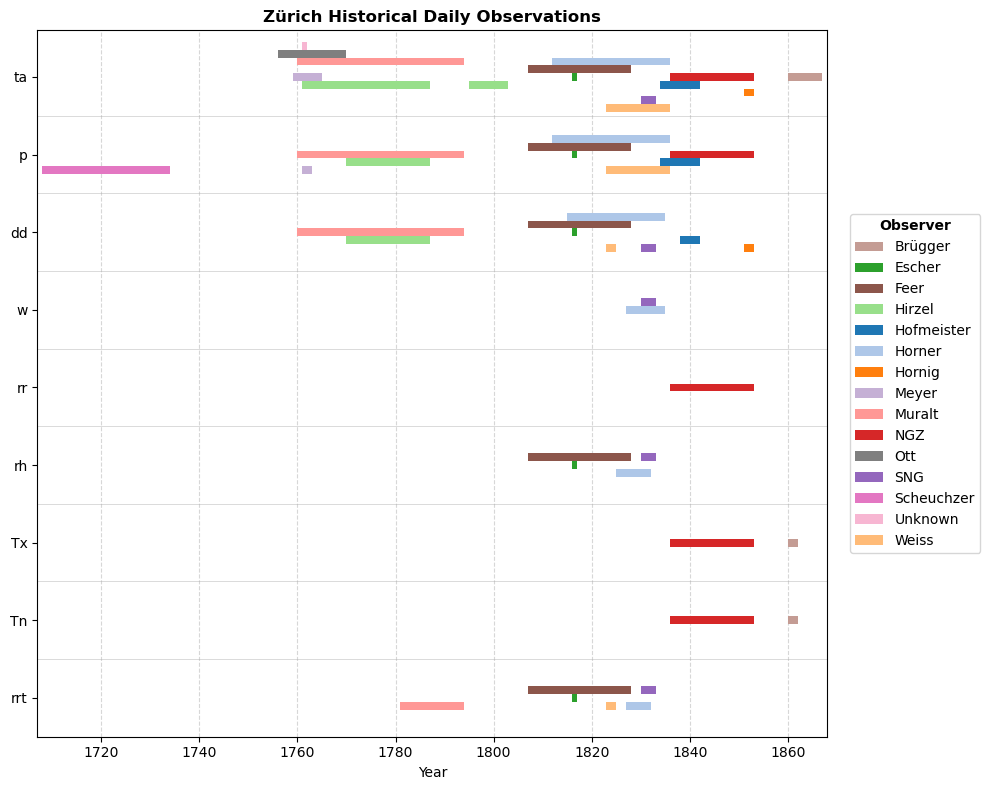

In [10]:

# --- PREP FOR PLOT ---
variables = sorted(df["Variable"].unique())
var_order = ["ta", "p", "dd", "w", "rr", "rh", "Tx", "Tn", "rrt"]
variables = [v for v in var_order if v in df["Variable"].unique()]
nvar = len(variables)
y_map = {var: i for i, var in enumerate(variables)}  # reverse order for plotting

observers = df["Observer"].unique()
colors = plt.cm.tab20.colors
color_map = {obs: colors[i % len(colors)] for i, obs in enumerate(observers)}

# --- PLOT ---
fig, ax = plt.subplots(figsize=(10, 8))

lane = {v: {} for v in variables}   # per-variable lanes (one lane per observer)
lane_step = 0.2
bar_h = 0.5 * lane_step
y_center = {v: (nvar - 1 - i) for i, v in enumerate(variables)}

# Sort by variable, start time, then observer to handle overlaps properly
for _, row in df.sort_values(["Variable", "Observer", "Start"]).iterrows():
    v = row.Variable

    # Find the first available lane that doesn't overlap with existing bars
    if row.Observer not in lane[v]:
        # Check which lanes are occupied for this time period
        occupied_lanes = set()
        for obs, obs_lane in lane[v].items():
            # Get all records for this observer and variable to check overlap
            obs_records = df[(df.Observer == obs) & (df.Variable == v)]
            for _, obs_row in obs_records.iterrows():
                # Check if time periods overlap
                if not (row.End < obs_row.Start or row.Start > obs_row.End):
                    occupied_lanes.add(obs_lane)
        
        # Assign to first available lane
        lane_idx = 0
        while lane_idx in occupied_lanes:
            lane_idx += 1
        lane[v][row.Observer] = lane_idx

    m = max(lane[v].values()) + 1  # Total number of lanes used
    k = lane[v][row.Observer]      # lane index for this observer within variable v
    y = y_center[v] + (k - (m - 1)/2.0) * lane_step
    ax.barh(y, row.End - row.Start + 1, left=row.Start, height=bar_h,
            color=color_map[row.Observer], edgecolor="none", label=row.Observer)

for i in range(nvar - 1):

    y_sep = (y_center[variables[i]] + y_center[variables[i+1]]) / 2.0
    ax.axhline(y_sep, color="gray", linewidth=0.4, alpha=0.5, zorder=0)

# legend with unique observers
handles, labels = ax.get_legend_handles_labels()
by_label = {l: h for h, l in zip(handles, labels)}
sorted_labels = sorted(by_label.keys())
ax.legend([by_label[l] for l in sorted_labels], sorted_labels,
          title="Observer", title_fontproperties={"weight": "bold"},
          bbox_to_anchor=(1.02, .75), loc="upper left")

# Set y-axis limits with proper padding
ymin = min(y_center[v] - (max(lane[v].values()) + 1) * 0.5 * lane_step for v in variables) - 0.3
ymax = max(y_center[v] + (max(lane[v].values()) + 1) * 0.5 * lane_step for v in variables) + 0.1

ax.set_yticks([y_center[v] for v in variables])
ax.set_yticklabels(variables)
ax.set_ylim(ymin, ymax)

ax.set_xlabel("Year")
ax.set_xlim(df["Start"].min() - 1, df["End"].max() + 2)
ax.set_title("Zürich Historical Daily Observations", fontweight="bold")
ax.grid(True, axis="x", linestyle="--", alpha=0.5)
ax.set_axisbelow(True)
plt.tight_layout()
plt.savefig("zurich_observers_variables_timeline.png", dpi=300)
plt.show()


In [82]:
y_center

{'ta': 8,
 'p': 7,
 'dd': 6,
 'w': 5,
 'rr': 4,
 'rh': 3,
 'Tx': 2,
 'Tn': 1,
 'rrt': 0}

In [ ]:


# offsets = {var: {} for var in variables}
# for _, row in df.iterrows():
#     var = row.Variable
#     if row.Observer not in offsets[var]:
#         offsets[var][row.Observer] = len(offsets[var]) * 0.11 # vertical offset per observer
#     y = y_map[var] + offsets[var][row.Observer]
#     ax.barh(y, row.End - row.Start + 1, left=row.Start, height=0.11,
#             color=color_map[row.Observer], label=row.Observer)

# Add horizontal lines to separate variable groups
# for y in y_map.values():
#     ax.axhline(y + 0.5, color='gray', linewidth=.4, linestyle="--", alpha=0.5)


# ax.set_yticks(list(y_map.values()))
# ax.set_yticklabels(list(y_map.keys()))
# ax.set_ylim(-0.5, len(variables) +1)